## Загружаем нужные библиотеки и датасет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
#!pip install fastcluster

In [2]:
df = pd.read_csv('data.csv')


In [3]:
df.describe()

,segment_id,Spanish_Travel,Participative_economy,Sports_equipments_and_Outdoor_gear,Swimming,Sunny_Destination,Social_and_Environmental_Sustainability,TV_Shows,Tv_channels,Retirement_period,...,History,Furniture,Going_out,Music,Medical_Schools,Gambling,Graphic_design,Hiking_and_Mountaineering,Fine_dining_and_local_produce,High_Fashion
count,20000.0,242.000000,464.000000,218.000000,749.000000,2664.000000,310.000000,1554.000000,915.000000,2173.000000,...,1464.000000,2365.000000,1744.000000,485.000000,1994.000000,305.000000,641.000000,543.000000,2319.000000,231.00000
mean,118356.0,17.144628,15.896552,17.885321,17.997330,15.231982,18.906452,13.662162,13.546448,15.540267,...,17.424863,14.740381,17.368693,16.830928,17.797894,17.996721,17.776911,17.569061,16.689953,16.30303
std,0.0,3.111975,1.890658,1.459330,1.048295,2.711060,0.969247,5.332453,3.266563,3.134179,...,2.288749,2.271038,1.877171,2.274607,1.768253,2.004105,1.203574,1.662013,1.697340,3.36658
min,118356.0,7.000000,7.000000,13.000000,14.000000,5.000000,12.000000,4.000000,7.000000,1.000000,...,7.000000,6.000000,1.000000,7.000000,10.000000,5.000000,8.000000,10.000000,7.000000,8.00000
25%,118356.0,17.000000,15.000000,17.000000,18.000000,14.000000,19.000000,9.000000,12.000000,13.000000,...,17.000000,14.000000,16.000000,16.000000,17.000000,17.000000,17.000000,17.000000,16.000000,13.00000
50%,118356.0,18.000000,16.000000,18.000000,18.000000,15.000000,19.000000,15.000000,12.000000,16.000000,...,17.000000,14.000000,17.000000,16.000000,17.000000,18.000000,18.000000,18.000000,16.000000,17.00000
75%,118356.0,19.000000,16.000000,19.000000,18.000000,18.000000,19.000000,19.000000,16.000000,19.000000,...,20.000000,16.000000,19.000000,19.000000,20.000000,19.000000,18.000000,18.000000,18.000000,19.00000
max,118356.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000


## Удаляем аттрибуты, не являющиеся интересами, ставим нули в пропусках

In [4]:
df.columns.values

array(['segment_id', 'weboid', 'Spanish_Travel', 'Participative_economy',
       'Sports_equipments_and_Outdoor_gear', 'Swimming',
       'Sunny_Destination', 'Social_and_Environmental_Sustainability',
       'TV_Shows', 'Tv_channels', 'Retirement_period', 'Theatre', 'Rugby',
       'Tennis', 'Weather', 'Urban_cars', 'Popular_Events', 'Phone',
       'Supermarkets', 'Painting', 'Sport_and_luxury_cars', 'Soccer',
       'Software_development', 'Travel_in_France', 'Social_networks',
       'Teaching', 'Sports', 'Science', 'Tablet', 'Utility_vehicles',
       'Pets', 'Transition_Fuel', 'Tourism', 'Tradesman',
       'Toys_and_games', 'Underwear',
       'Vegetarian_and_Environmentally_friendly', 'Political_News',
       'Top_Business_schools', 'Veg_and_Vegan', 'Software',
       'Reality_Television', 'Telecom_operators', 'Soft_drinks',
       'Philosophy', 'South_American_Travel', 'Outdoor_activities',
       'Public_administrations', 'Top_Engineering_schools', 'Sedan',
       'Savoury_Fo

In [5]:
df = df.drop(['segment_id','weboid','female','surf_intensity','income_middle_high',
              'income_low','income_middle','age_65_110','age_25_34',
              'male','age_50_64','education_Undergraduate','age_35_49',
              'education_Postgraduates','income_high','age_18_24',
              'income_top','education_Professional'],axis=1)
df = df.fillna(0)

In [6]:
df

,Spanish_Travel,Participative_economy,Sports_equipments_and_Outdoor_gear,Swimming,Sunny_Destination,Social_and_Environmental_Sustainability,TV_Shows,Tv_channels,Retirement_period,Theatre,...,History,Furniture,Going_out,Music,Medical_Schools,Gambling,Graphic_design,Hiking_and_Mountaineering,Fine_dining_and_local_produce,High_Fashion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,20.0,0.0,6.0,0.0,0.0,18.0,...,0.0,16.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Сокращаем размерность до 2 измерений, чтобы построить график

In [7]:
pca=PCA(n_components=2, random_state = 2) #фиксирую рандом стейт для воспроизводимости

pca_representation=pca.fit_transform(df)

print('before PCA: '+str(df.shape))
print('2D PCA: '+str(pca_representation.shape))

before PCA: (20000, 211)
2D PCA: (20000, 2)


График

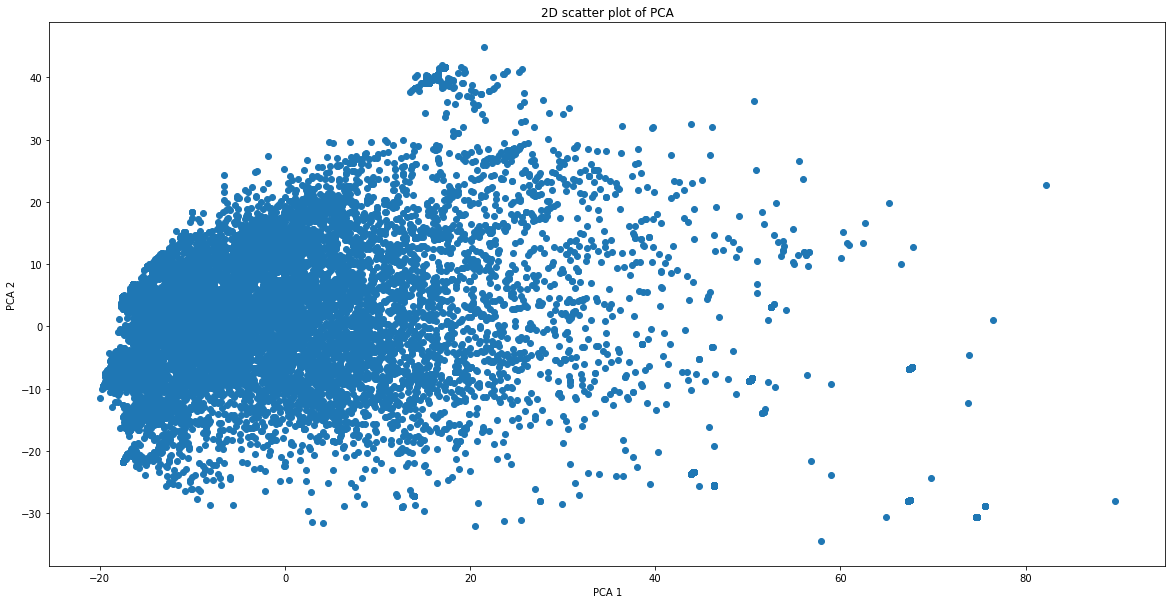

In [8]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,1])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('2D scatter plot of PCA')
plt.show()

Так как наблюдений много, точки сливаются в одну массу. Чтобы посмотреть подробнее, построим гексагональный график

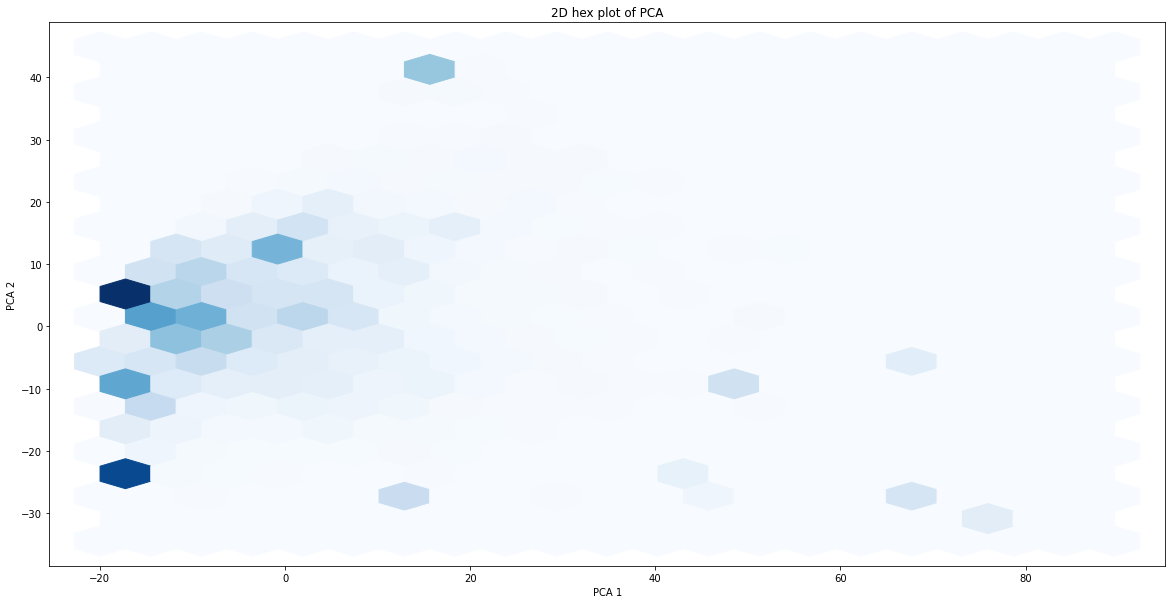

In [9]:
fig,ax=plt.subplots(figsize=(20, 10))
plt.hexbin(pca_representation[:,0],pca_representation[:,1], gridsize = 20, cmap ='Blues') 
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('2D hex plot of PCA')
plt.show()

Видно, что есть несколько "кандидатов" на кластеры. Однако, сокращение размерности до 2 потеряло слишком много информации. Непосредственно кластеризацию стоит запустить на пространстве бОльшей размерности.


## Кластеризация

### Снижение размерности для кластеризации

In [10]:
pca_2=PCA(n_components=12, random_state = 2) #фиксирую рандом стейт для воспроизводимости

pca_clustering=pca_2.fit_transform(df)

print('before PCA: '+str(df.shape))
print('2D PCA: '+str(pca_clustering.shape))

before PCA: (20000, 211)
2D PCA: (20000, 12)


## Дендрограмма и определение оптимального размера кластеров

In [15]:
def dendrogram(dataset,max_group=10,method_param='ward',metric_param='euclidean'):
        from scipy.cluster.hierarchy import dendrogram
        import matplotlib.pyplot as plt
        from fastcluster import  linkage_vector
        from scipy.spatial.distance import pdist
        
        model = linkage_vector(dataset,method=method_param,metric=metric_param)

        fig,ax=plt.subplots(figsize=(10,20))
        ax.set_title("Dendrogram")
        dendrogram(model,orientation='top',truncate_mode='lastp', p=max_group,show_contracted=True)
        plt.show()

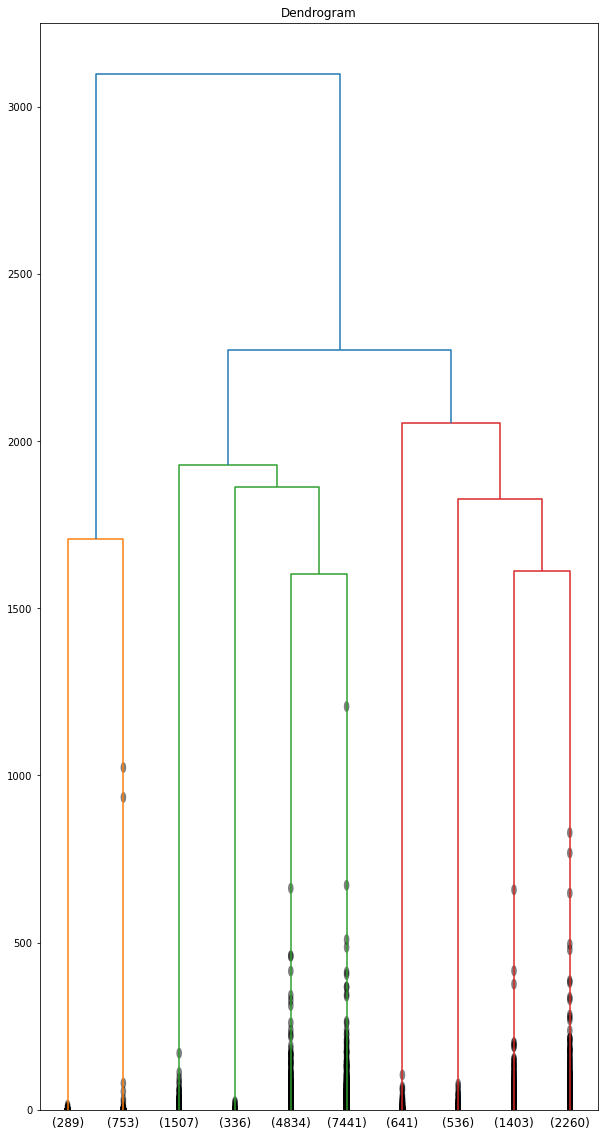

In [13]:
dendrogram(pca_clustering,max_group=10)

Судя по непропорциональным размером кластеров, 10 -- слишком большое число. Эмпирически предлагаю остановиться на 5 кластерах -- отметка в районе 1800 на графике -- а также в соответствии с рекомендацией

## Кластеризация

Используем библиотеку sklearn. И изначальные аттрибуты ("квантили"), и получившиеся главные компоненты лежат приблизительно в одних порядках цифр, можно использовать метод минимума дисперсии Уорда (linkage = 'ward'), который минимизирует, очевидно, общую дисперсию внутри кластера.

Другим аргументом за "Уорда" является официальная документация sklearn:
https://scikit-learn.org/stable/modules/clustering.html#different-linkage-type-ward-complete-average-and-single-linkage

С вот такой картинкой:


![Linkage types](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)

Наши данные больше всего похожи на последний ряд -- его вполне корректно кластеризует метод Уорда

Отдельно отмечу, что мы не задаем метод поиска расстояния между векторами наблюдений, так как в случае использования Уорда он может быть только один -- евклидова метрика

In [11]:
clustering = AgglomerativeClustering(n_clusters=5,linkage='ward')
clustering.fit(pca_clustering)

AgglomerativeClustering(n_clusters=5)

Посчитаем размеры кластеров

In [12]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 12611, 1: 1042, 2: 4199, 3: 641, 4: 1507}

Посмотрим на кластеры

In [13]:
from matplotlib.lines import Line2D
for_graph = pd.DataFrame({'PCA1': pca_representation[:, 0], 'PCA2': pca_representation[:, 1], 'Cluster':clustering.labels_})
colors=["#006FA6","#A30059","#FFDBE5","#7A4900","#0000A6",]
for_graph['c'] = for_graph.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

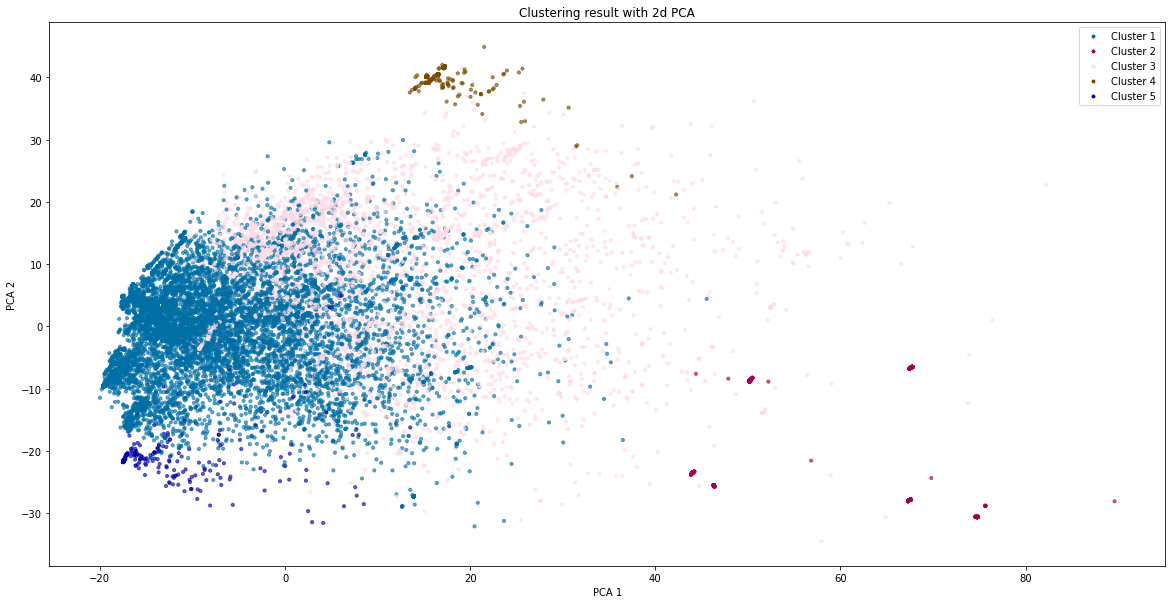

In [14]:
fig,ax=plt.subplots(figsize=(20, 10))

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper right')
plt.scatter(for_graph.PCA1, for_graph.PCA2, c=for_graph.c, alpha = 0.6, s=10)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Clustering result with 2d PCA')
plt.show()

Выглядит удовлетворительно.

Добавим эти кластеры в датасет

In [15]:
df['cluster'] = clustering.labels_

Посчитаем аплифты, соберем в словарь для простоты

In [16]:
def clustDesc(original_dataframe,clusters_predicted,i):

    t1=original_dataframe[clusters_predicted==i].mean()
    t2=original_dataframe.mean()

    t4=t1/t2

    d= pd.DataFrame({'AVGCluster':t1,'AVG':t2, 'Uplift':t4}).sort_values(by='Uplift',ascending=False)

 
    cols=['AVGCluster','AVG','Uplift']
    d=d[cols].reset_index()
    d = d.rename(columns={'index':'interest'})
    return d

In [18]:
clustDesc(df,df.cluster,1)

,interest,AVGCluster,AVG,Uplift
0,Telecom_operators,12.709213,0.80385,15.810429
1,Top_Business_schools,9.046065,0.66835,13.534922
2,Car_buyers,8.179463,0.70050,11.676606
3,Utility_vehicles,8.480806,0.76240,11.123828
4,DIY_Equipment,7.895393,0.71515,11.040192
...,...,...,...,...
207,Deodorant,0.000000,0.27415,0.000000
208,Bodybuilding,0.000000,0.71750,0.000000
209,Cosmetic_surgery,0.000000,0.18995,0.000000
210,Churn_Telecom,0.000000,0.04870,0.000000


In [97]:
top_interests = {}
for i in range(5):
    data = clustDesc(df,clustering.labels_,i)
    top_interests[i] = data['interest'].head(6).values
top_interests

{0: array(['Banking', 'ISP_and_Browsers', 'Games_consoles', 'Rugby',
        'Major_Appliances_White_goods', 'Public_administrations'],
       dtype=object),
 1: array(['Telecom_operators', 'Top_Business_schools', 'Car_buyers',
        'Utility_vehicles', 'DIY_Equipment', 'Software_development'],
       dtype=object),
 2: array(['Gluten_Free', 'Motor_Sport', 'Savoury_Food', 'Snacks',
        'Veg_and_Vegan', 'Motorcycles_and_bicycles'], dtype=object),
 3: array(['Relaxation_therapy', 'Science', 'Diet_and_nutrition', 'Tourism',
        'Literature', 'Dogs'], dtype=object),
 4: array(['Dating', 'Insurance_churning', 'Social_networks', 'cluster',
        'Back_to_school', 'Sedan'], dtype=object)}

Размеры кластеров в процентах

In [47]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts/20000*100))

{0: 63.05500000000001, 1: 5.21, 2: 20.995, 3: 3.205, 4: 7.535}